## Problem Statement: given the features an insured's age, sex, bmi, no. of children, whether is a smoker or not and which region the insured is from, what will be the likely insurance charge?  We will adopt a regression method to address this. 

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pyg
%matplotlib inline 

In [2]:
# setting options
pd.options.display.max_columns=20
pd.options.display.min_rows=25
pd.options.display.precision = 3

In [3]:
# create a variable for the file to be read/loaded
file = "datasets/insurance.csv"

In [4]:
# load the file and read the 1st 5 rows 
data = pd.read_csv(file)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855


## Data Exploration

In [5]:
import ydata_profiling
from ydata_profiling import ProfileReport

C:\Users\User\anaconda3\envs\jupyter-ai\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\User\anaconda3\envs\jupyter-ai\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [6]:
profile = ProfileReport(data, title='Pandas Profiling Report')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# from the eda above, there is a duplicated record.  Let's have a look
data[data.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.563
581,19,male,30.59,0,no,northwest,1639.563


#### From the EDA, we can gather that:
- there are no missing values in the dataset
- there is a duplicate record as shown above
- from the correlation heatmap, it appears that charges are closely correlated to age and whether the person is a smoker or not
- the mean and median insurance charges for a smoker is much higher than a non-smoker
- the mean insurance charges for a Male is higher than that of a Female
- bmi does not seem to play a big role in the determination of insurance charges
- the insurance charges across the region are generally in line though the southeast region exhibit higher insurance charges

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…


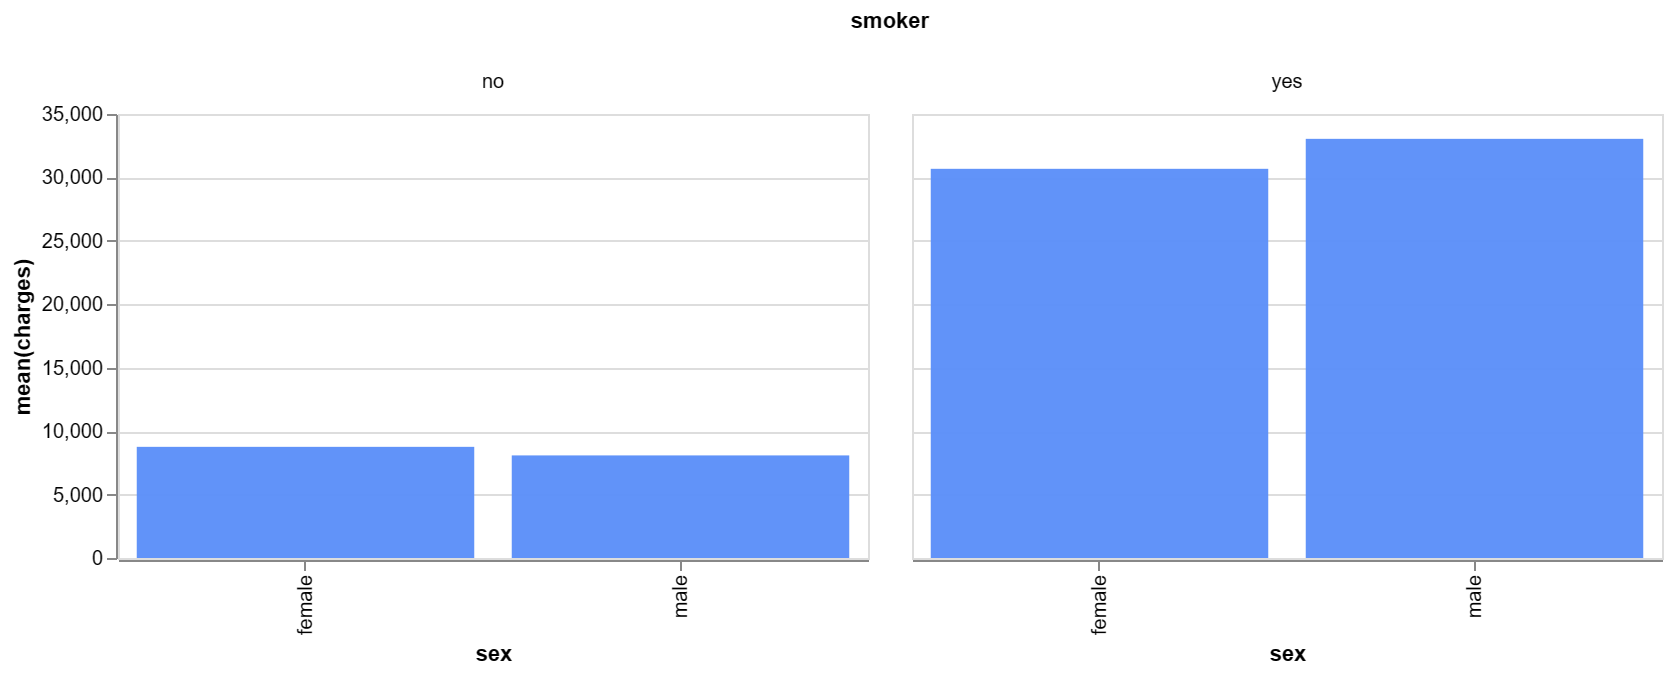
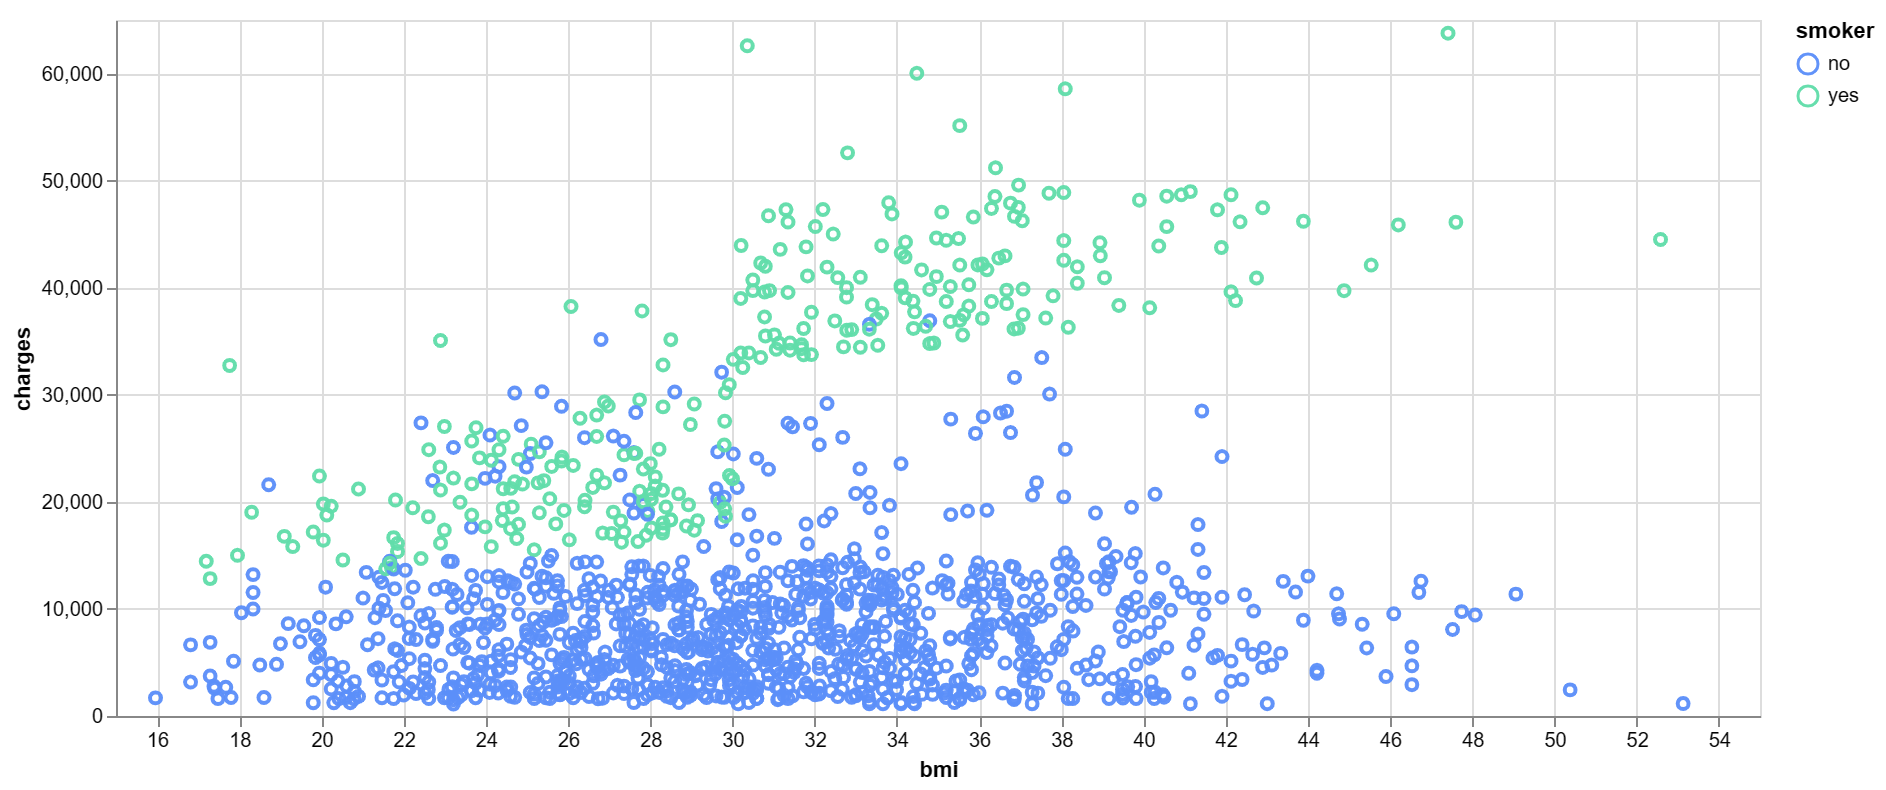
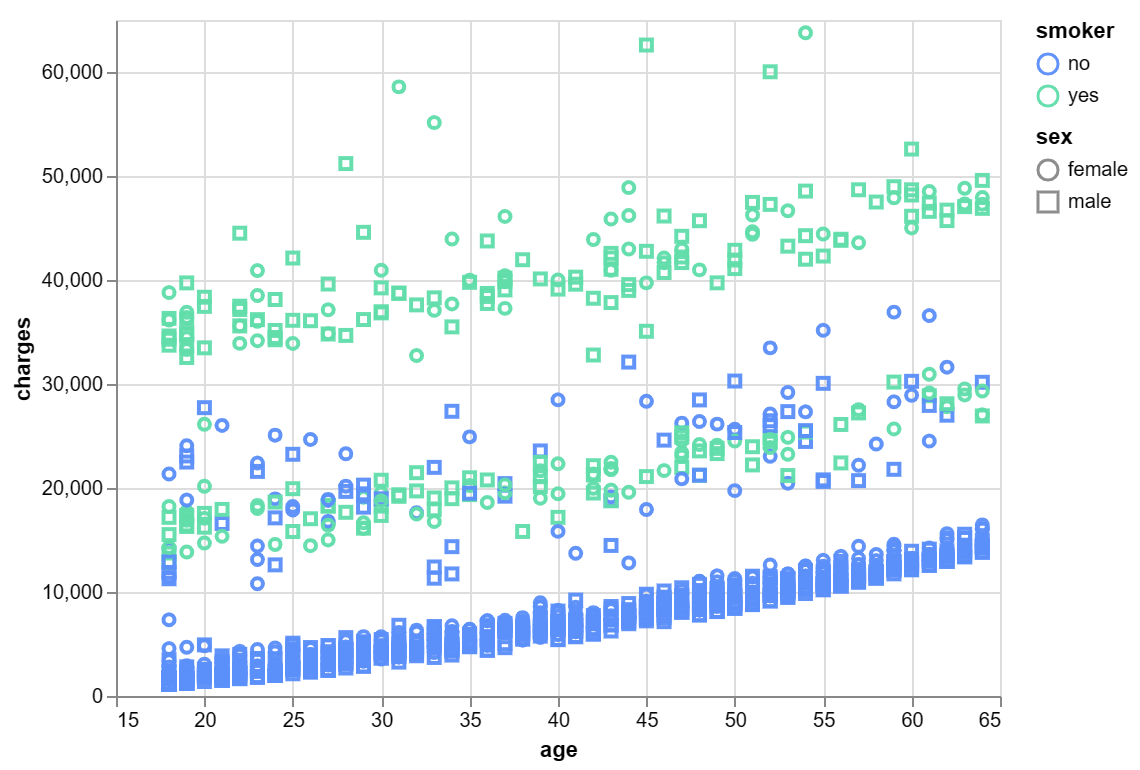

In [8]:
# using pygwalker to perform initial eda
walker = pyg.walk(data, spec='config.json', use_preview=True)

### The eda performed with the pygwalker package confirms our observations.

## Regression Analysis on the Dataset with Linear Regression

In [9]:
# let's make a copy of the data for further processing and have a look ath the last 5 rows of the dataset
df = data.copy()
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.548
1334,18,female,31.92,0,no,northeast,2205.981
1335,18,female,36.85,0,no,southeast,1629.833
1336,21,female,25.80,0,no,southwest,2007.945
1337,61,female,29.07,0,yes,northwest,29141.360


In [10]:
# let's confirm there is no missing data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# what's the size of our dataset?
df.shape

(1338, 7)

In [12]:
# as noted above, there is 1 duplicate record - let's remove it
df.drop_duplicates(inplace=True)

In [13]:
# check the size of the dataset again to ensure there is a 1 row reduction
df.shape

(1337, 7)

In [14]:
# import encoder for categorical features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

lb = LabelEncoder()
ohe = OneHotEncoder()

In [15]:
# transforming cateogrical data to numericals
df['sex'] = lb.fit_transform(df['sex'])
df['smoker'] = lb.fit_transform(df['smoker'])
df['region'] = lb.fit_transform(df['region'])

In [16]:
# check that the 3 columns have been 'transformed'
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.924
1,18,1,33.770,1,0,2,1725.552
2,28,1,33.000,3,0,2,4449.462
3,33,1,22.705,0,0,1,21984.471
4,32,1,28.880,0,0,1,3866.855


In [17]:
# segregate dataset into dependent (y) and independent variables (X)
X = df.drop(columns='charges', axis=1)
y = df['charges']

In [18]:
# check shape of X and y
X.shape , y.shape

((1337, 6), (1337,))

In [19]:
# split dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 18)

In [20]:
# initialize model and metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
# checking coefficient and intercept
lr.intercept_
lr.coef_

array([  256.08676658,  -179.1545516 ,   314.50046334,   473.22510167,
       24348.43625846,  -432.00379053])

In [22]:
# making predictions
y_pred = lr.predict(X_test)

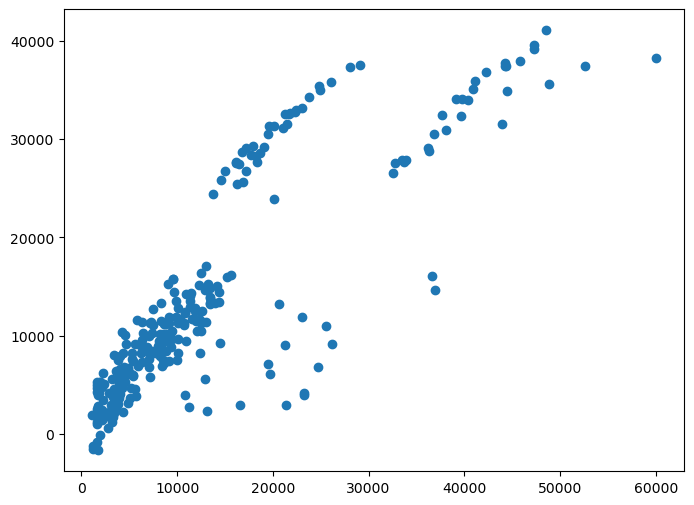

In [23]:
# visualizing the metrics
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred);


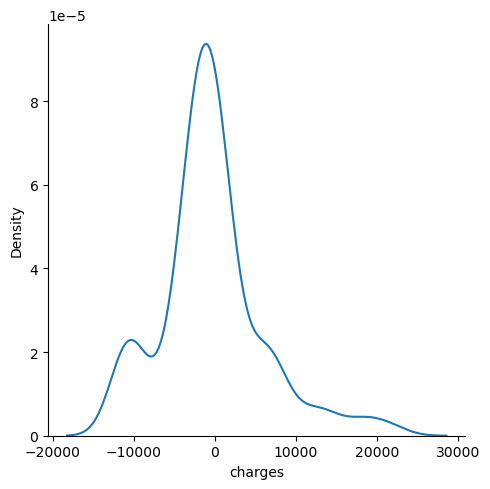

In [24]:
# visualize the rsiduals
residuals = y_test - y_pred
sns.displot(residuals, kind='kde');

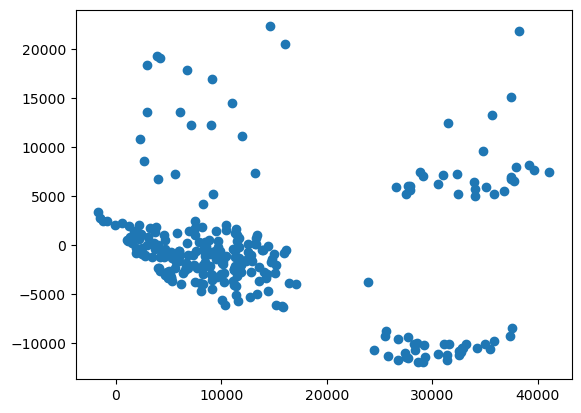

In [25]:
# visual predictions and residuals
plt.scatter(y_pred, residuals);

In [26]:
# checking the metrics of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
adjusted_r2 = 1-(1-score) * (len(y_test)-1 / (len(y_test) - X_test.shape[1]-1))

In [27]:
print(f"Mean Squared Error for Baseline model is: {mse}")
print(f"Mean Absolute Error for Baseline model is: {mae}")
print(f"r2 score for Baseline model is: {score}")
print(f"Adjusted r2 score for Baseline model is: {adjusted_r2}")

Mean Squared Error for Baseline model is: 40937043.28462229
Mean Absolute Error for Baseline model is: 4474.974879875029
r2 score for Baseline model is: 0.71643501105364
Adjusted r2 score for Baseline model is: -74.99433058172812


## Experiment with Same Model But With Scaling Performed

In [28]:
# make a copy of the dataset
df1 = data.copy()

In [29]:
# check the shape of the copied dataset to ensure completeness
df1.shape

(1338, 7)

In [30]:
# check for duplicates
df1.loc[df1.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.563
581,19,male,30.59,0,no,northwest,1639.563


In [31]:
# as noted above, there is 1 duplicate record - let's remove it
df1.drop_duplicates(inplace=True)

In [32]:
# re-check the data to ensure there is a reduction of 1 row
df1.shape

(1337, 7)

In [33]:
# import encoder for categorical features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

lb = LabelEncoder()
ohe = OneHotEncoder()

In [34]:
# transforming cateogrical data to numericals
df1['sex'] = lb.fit_transform(df1['sex'])
df1['smoker'] = lb.fit_transform(df1['smoker'])
df1['region'] = lb.fit_transform(df1['region'])

In [35]:
# check that transformations have been done
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.924
1,18,1,33.770,1,0,2,1725.552
2,28,1,33.000,3,0,2,4449.462
3,33,1,22.705,0,0,1,21984.471
4,32,1,28.880,0,0,1,3866.855


In [36]:
# segregate dataset into dependent (y) and independent variables (X)
X= df1.drop(columns='charges', axis=1)
y = df1['charges']

In [37]:
# check shape of X and y
X.shape , y.shape

((1337, 6), (1337,))

In [38]:
# split dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 18)

In [39]:
# standardization of datapoints
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [40]:
# initialize model and metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
# making predictions
y_pred = lr.predict(X_test_scaled)

In [42]:
# checking the metrics of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
adjusted_r2 = 1-(1-score) * (len(y_test)-1 / (len(y_test) - X_test.shape[1]-1))

In [43]:
print(f"Mean Squared Error for Linear Regression (w StandardScaler) is: {mse}")
print(f"Mean Absolute Error for Linear Regression (w StandardScaler) is: {mae}")
print(f"r2 score for Linear Regression (w StandardScaler) is: {score}")
print(f"Adjusted r2 score for Linear Regression (w StandardScaler) is: {adjusted_r2}")

Mean Squared Error for Linear Regression (w StandardScaler) is: 40937043.28462228
Mean Absolute Error for Linear Regression (w StandardScaler) is: 4474.9748798750325
r2 score for Linear Regression (w StandardScaler) is: 0.7164350110536402
Adjusted r2 score for Linear Regression (w StandardScaler) is: -74.9943305817281


#### The r2 score remains the same - this implies that standard scaling has no impact on the dataset in this instance.  However, it is always a good practice to scale the data so that the model will not be adversely affect by discrepancies in number range.

## Experiment With Another Model / Estimator (RandomForestRegressor)

In [44]:
# make a copy of the dataset
df2 = data.copy()

In [45]:
# check for duplicates
df2.loc[df2.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.563
581,19,male,30.59,0,no,northwest,1639.563


In [46]:
# as noted above, there is 1 duplicate record - let's remove it
df2.drop_duplicates(inplace=True)

In [47]:
# re-check the shape of the dataset to ensure that 1 row has been dropped
df2.shape

(1337, 7)

In [48]:
# import encoder for categorical features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

lb = LabelEncoder()
ohe = OneHotEncoder()

In [49]:
# transforming cateogrical data to numericals
df2['sex'] = lb.fit_transform(df2['sex'])
df2['smoker'] = lb.fit_transform(df2['smoker'])

In [50]:
# transforming 'region' to numericals
df2 = pd.get_dummies(df2, columns=['region'], drop_first=True)

In [51]:
# have a random look at 10 rows of the transformed dataset
df2.sample(10)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
145,29,0,38.830,3,0,5138.257,0,1,0
933,45,0,35.300,0,0,7348.142,0,0,1
764,45,0,25.175,2,0,9095.068,0,0,0
284,52,0,31.200,0,0,9625.920,0,0,1
788,29,1,22.515,3,0,5209.579,0,0,0
1049,49,1,30.900,0,1,39727.614,0,0,1
1039,19,1,27.265,2,0,22493.660,1,0,0
1007,47,1,28.215,3,1,24915.221,1,0,0
496,31,0,23.600,2,0,4931.647,0,0,1
1048,25,0,22.515,1,0,3594.171,1,0,0


In [52]:
# segregate dataset into dependent (y) and independent variables (X)
X= df2.drop(columns='charges', axis=1)
y = df2['charges']

In [53]:
# check shape of X and y
X.shape , y.shape

((1337, 8), (1337,))

In [54]:
# split dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 18)

In [55]:
# initialize model and metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

forest = RandomForestRegressor(n_estimators=100, criterion = 'squared_error', random_state = 18, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=18)

In [56]:
# making predictions
y_pred = forest.predict(X_test)

In [57]:
# checking the metrics of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
adjusted_r2 = 1-(1-score) * (len(y_test)-1 / (len(y_test) - X_test.shape[1]-1))

In [58]:
print(f"Mean Squared Error for RandomForestRegressor is: {mse}")
print(f"Mean Absolute Error for RandomForestRegressor is: {mae}")
print(f"r2 score for RandomForestRegressor is: {score}")
print(f"Adjusted r2 score for RandomForestRegressor is: {adjusted_r2}")

Mean Squared Error for RandomForestRegressor is: 23736788.40650846
Mean Absolute Error for RandomForestRegressor is: 2705.8939100876128
r2 score for RandomForestRegressor is: 0.8355786934753522
Adjusted r2 score for RandomForestRegressor is: -43.06427531730629


### The RandomForestRegressor achieved a r2 score of 0.8356 which is better than the baseline model of 0.7164

## Experiment With Another Model (RandomForestRegressor) with label encoding for the categorical features instead of one-hot-encoding for 'region'

In [59]:
# make a copy of the dataset
df3 = data.copy()

In [60]:
# check for duplicates
df3.loc[df3.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.563
581,19,male,30.59,0,no,northwest,1639.563


In [61]:
# as noted above, there is 1 duplicate record - let's remove it
df3.drop_duplicates(inplace=True)

In [62]:
# re-check the shape of the dataset to ensure that 1 row has been dropped
df3.shape

(1337, 7)

In [63]:
# import encoder for categorical features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

lb = LabelEncoder()
ohe = OneHotEncoder()

In [64]:
# transforming cateogrical data to numericals
df3['sex'] = lb.fit_transform(df3['sex'])
df3['smoker'] = lb.fit_transform(df3['smoker'])
df3['region'] = lb.fit_transform(df3['region'])

In [65]:
# have a random look at 5 rows of the transformed dataset
df3.sample(5)

,age,sex,bmi,children,smoker,region,charges
321,26,0,29.64,4,0,0,24671.663
376,39,0,24.89,3,1,0,21659.930
629,44,0,38.95,0,1,1,42983.459
918,61,0,28.20,0,0,3,13041.921
450,39,1,29.60,4,0,3,7512.267


In [66]:
# segregate dataset into dependent (y) and independent variables (X)
X= df3.drop(columns='charges', axis=1)
y = df3['charges']

In [67]:
# check shape of X and y
X.shape , y.shape

((1337, 6), (1337,))

In [68]:
# split dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 18)

In [69]:
# initialize model and metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

forest = RandomForestRegressor(n_estimators=100, criterion = 'squared_error', random_state = 18, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=18)

In [70]:
# making predictions
y_pred = forest.predict(X_test)

In [71]:
# checking the metrics of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
adjusted_r2 = 1-(1-score) * (len(y_test)-1 / (len(y_test) - X_test.shape[1]-1))

In [72]:
print(f"Mean Squared Error for RandomForestRegressor is: {mse}")
print(f"Mean Absolute Error for RandomForestRegressor is: {mae}")
print(f"r2 score for RandomForestRegressor is: {score}")
print(f"Adjusted r2 score for RandomForestRegressor is: {adjusted_r2}")

Mean Squared Error for RandomForestRegressor is: 22173257.90516052
Mean Absolute Error for RandomForestRegressor is: 2617.6630009959326
r2 score for RandomForestRegressor is: 0.8464090435387279
Adjusted r2 score for RandomForestRegressor is: -40.16178786052337


### The RandomForestRegressor with label encoding achieved a better r2 score of 0.8464 compared to the same model with one-hot-encoding which could imply that the one-hot-encoding did not contribute much to model performance

### Experimenting with another Model/Estimator : XGBoostRegressor

In [88]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/99.7 MB 5.7 MB/s eta 0:00:18
   ---------------------------------------- 0.8/99.7 MB 8.1 MB/s eta 0:00:13
    --------------------------------------- 1.3/99.7 MB 8.9 MB/s eta 0:00:12
    --------------------------------------- 1.8/99.7 MB 9.5 MB/s eta 0:00:11
    --------------------------------------- 2.3/99.7 MB 9.8 MB/s eta 0:00:10
   - -------------------------------------- 2.8/99.7 MB 10.0 MB/s eta 0:00:10
   - -------------------------------------- 3.4/99.7 MB 10.3 MB/s eta 0:00:10
   - -------------------------------------- 3.9/99.7 MB 10.4 MB/s eta 0:00:10
   - -------------------------------------- 4.5/99.7 MB 10.7 MB/s eta 0:00:09
   -- ----------------------

In [73]:
# make a copy of the dataset
df4 = data.copy()

In [74]:
# check for duplicates
df4.loc[df4.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.563
581,19,male,30.59,0,no,northwest,1639.563


In [75]:
# as noted above, there is 1 duplicate record - let's remove it
df4.drop_duplicates(inplace=True)

In [76]:
# re-check the shape of the dataset to ensure that 1 row has been dropped
df4.shape

(1337, 7)

In [77]:
# transforming cateogrical data to numericals
df4['sex'] = lb.fit_transform(df4['sex'])
df4['smoker'] = lb.fit_transform(df4['smoker'])
df4['region'] = lb.fit_transform(df4['region'])

In [78]:
# have a random look at 5 rows of the transformed dataset
df4.sample(5)

,age,sex,bmi,children,smoker,region,charges
228,41,0,31.635,1,0,0,7358.176
777,45,1,39.805,0,0,0,7448.404
316,50,1,32.205,0,0,1,8835.265
1236,63,0,21.660,0,0,0,14449.854
734,59,0,32.100,3,0,3,14007.222


In [79]:
# segregate dataset into dependent (y) and independent variables (X)
X= df4.drop(columns='charges', axis=1)
y = df4['charges']

In [80]:
# check shape of X and y
X.shape , y.shape

((1337, 6), (1337,))

In [81]:
# split dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 18)

In [82]:
# initialize model and metrics
from xgboost import XGBRegressor as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

xgb_model =  xgb()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [83]:
# making predictions
y_pred = xgb_model.predict(X_test)

In [84]:
# checking the metrics of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
adjusted_r2 = 1-(1-score) * (len(y_test)-1 / (len(y_test) - X_test.shape[1]-1))

In [85]:
print(f"Mean Squared Error for XGBoostRegressor is: {mse}")
print(f"Mean Absolute Error for XGBoostRegressor is: {mae}")
print(f"r2 score for XGBoostRegressor is: {score}")
print(f"Adjusted r2 score for XGBoostRegressor is: {adjusted_r2}")

Mean Squared Error for XGBoostRegressor is: 24769659.792484183
Mean Absolute Error for XGBoostRegressor is: 2734.977616963838
r2 score for XGBoostRegressor is: 0.8284241424954274
Adjusted r2 score for XGBoostRegressor is: -44.981672432461075


### The RandomForestRegressor with label encoding for the categorical features of 'sex', 'smoker' and 'region' has a r2 score of 0.846 is much better than the baseline model of 0.716 as well as other variations (including the XGBoostRegressor above).

### We will further refine the RandomForestRegressor model through hyperparameters tuning to check if we can improve model's performance

In [86]:
# make a copy of the dataset
df5 = data.copy()

In [87]:
# check for duplicates
df5.loc[df5.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.563
581,19,male,30.59,0,no,northwest,1639.563


In [88]:
# as noted above, there is 1 duplicate record - let's remove it
df5.drop_duplicates(inplace=True)

In [89]:
# transforming cateogrical data to numericals
df5['sex'] = lb.fit_transform(df5['sex'])
df5['smoker'] = lb.fit_transform(df5['smoker'])
df5['region'] = lb.fit_transform(df5['region'])

In [90]:
# segregate dataset into dependent (y) and independent variables (X)
X= df5.drop(columns='charges', axis=1)
y = df5['charges']

In [91]:
# split dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 18)

In [92]:
# initialize model and metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

forest = RandomForestRegressor()

In [93]:
# create the search paramters - need to review the documentation in sklearn library to understand available hyper parameters for tuning
grid = {"n_estimators": [100, 200, 300, 400, 500],
        "max_features" : ['sqrt', 'log2'],
        "max_depth" : [2, 3, 4, 5, 6, 7],
        "min_samples_split" : [2, 3, 4, 5]}

In [94]:
# initialize the grid search
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator = forest, param_grid = grid, cv =5, verbose = 3, n_jobs=-1) 

In [95]:
# fit the dataset X, y
gs.fit(X, y)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=3)

In [96]:
# obtaining the best parameters
gs.best_estimator_

RandomForestRegressor(max_depth=7, max_features='log2', min_samples_split=3)

In [97]:
# understanding the best hyperparameters
gs.best_params_

{'max_depth': 7,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 100}

In [98]:
# understanding the best score
gs.best_score_

0.8490468039005474

In [99]:
# creating a classifier object for cross validation based on the best parametes above
classifier = RandomForestRegressor(max_depth = 7, max_features = 'log2', min_samples_split = 3, n_estimators = 100, random_state=18)

In [100]:
# perform the cross-validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=10)

In [101]:
# understand the average score from the cross-valiation
score.mean()

0.8471743681623398

### Instead of a gridsearch (more exhaustive), let's experiment with a randomized search

In [102]:
# initialize the randomized search
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(estimator = forest, param_distributions = grid, cv =5, verbose = 3, n_jobs=-1) 

In [103]:
# fitting the randomized search to the dataset X, y
rs.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=3)

In [104]:
# understanding the best hyperparameters
rs.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'max_features': 'log2',
 'max_depth': 7}

In [105]:
# understanding the best score
rs.best_score_

0.8462652480030659

### Let's use the hyperparameters obtained from the gridsearch to revise / finalize our RandomForestRegressor model

In [111]:
# revise the parameters of the RandomForestRegressor model
forest_gs = RandomForestRegressor(max_depth = 7, max_features = 'sqrt', min_samples_split = 3, n_estimators = 500, random_state=18)

In [112]:
# fit the model to the training sets
forest_gs.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features='sqrt', min_samples_split=3,
                      n_estimators=500, random_state=18)

In [113]:
# making predictions
y_pred = forest_gs.predict(X_test)

In [114]:
# checking the metrics of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
adjusted_r2 = 1-(1-score) * (len(y_test)-1 / (len(y_test) - X_test.shape[1]-1))

In [115]:
print(f"Mean Squared Error for RandomForestRegressor (updated) is: {mse}")
print(f"Mean Absolute Error for RandomForestRegressor (updated) is: {mae}")
print(f"r2 score for RandomForestRegressor (updated) is: {score}")
print(f"Adjusted r2 score for RandomForestRegressor (updated) is: {adjusted_r2}")

Mean Squared Error for RandomForestRegressor (updated) is: 21808267.872780282
Mean Absolute Error for RandomForestRegressor (updated) is: 2943.96887816091
r2 score for RandomForestRegressor (updated) is: 0.8489372768011509
Adjusted r2 score for RandomForestRegressor (updated) is: -39.48423103291148


## The 'improved' RandomForestRegressor with the hyperparameters obtained through GridSearchCV returned an r2 score of 0.849 (compared with the previous best of 0.846) and a reduced MSE of 364,990, compared with the previous best.  We can finalize the model by using these hyperparameters to be used for future predictions

In [116]:
# saving the final model
import pickle

filename = "final_forest_gs.pickle"

# save model
pickle.dump(forest_gs, open(filename, "wb"))


In [117]:
# load model
loaded_model = pickle.load(open(filename, "rb"))

In [118]:
# check the loaded model to confirm the hyperparameters are the same as that obtained through the GridSearchCV
loaded_model

RandomForestRegressor(max_depth=7, max_features='sqrt', min_samples_split=3,
                      n_estimators=500, random_state=18)